In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("netflix.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [3]:
# Finding column names containing Null values
print("Column Names containing Null values:")
for col_name in df.columns:
  if df[col_name].isnull().values.any():
    print(f"{col_name}")

Column Names containing Null values:
director
cast
country
date_added
rating
duration


> We will be handling the null values for `country`, `date_added`, `rating`, `duration` separately as they can be estimated approximately on the basis of release date, actors and director.

In [4]:
# Handling Null values
df["director"] = df["director"].fillna("Unknown Director")
df["cast"] = df["cast"].fillna("Unknown Actor")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Check for columns which require un-nesting
for col in df.columns:
  if df[col].dtype == 'O':
    if df[col].str.contains(", ").any():
      print(col)

title
director
cast
country
date_added
listed_in
description


> Ignoring un-nesting requirements for `title`, `date_added` and `description` as they are a part of string description or are formatted in that manner

In [6]:
# Unnesting the Actor names from Cast
actors_list = df["cast"].apply(lambda x: x.split(", ")).to_list()
actors_list

[['Unknown Actor'],
 ['Ama Qamata',
  'Khosi Ngema',
  'Gail Mabalane',
  'Thabang Molaba',
  'Dillon Windvogel',
  'Natasha Thahane',
  'Arno Greeff',
  'Xolile Tshabalala',
  'Getmore Sithole',
  'Cindy Mahlangu',
  'Ryle De Morny',
  'Greteli Fincham',
  'Sello Maake Ka-Ncube',
  'Odwa Gwanya',
  'Mekaila Mathys',
  'Sandi Schultz',
  'Duane Williams',
  'Shamilla Miller',
  'Patrick Mofokeng'],
 ['Sami Bouajila',
  'Tracy Gotoas',
  'Samuel Jouy',
  'Nabiha Akkari',
  'Sofia Lesaffre',
  'Salim Kechiouche',
  'Noureddine Farihi',
  'Geert Van Rampelberg',
  'Bakary Diombera'],
 ['Unknown Actor'],
 ['Mayur More',
  'Jitendra Kumar',
  'Ranjan Raj',
  'Alam Khan',
  'Ahsaas Channa',
  'Revathi Pillai',
  'Urvi Singh',
  'Arun Kumar'],
 ['Kate Siegel',
  'Zach Gilford',
  'Hamish Linklater',
  'Henry Thomas',
  'Kristin Lehman',
  'Samantha Sloyan',
  'Igby Rigney',
  'Rahul Kohli',
  'Annarah Cymone',
  'Annabeth Gish',
  'Alex Essoe',
  'Rahul Abburi',
  'Matt Biedel',
  'Michael Tr

In [7]:
cast_df = pd.DataFrame(data=actors_list, index = df["title"])
cast_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,Unknown Actor,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,Unknown Actor,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None


In [8]:
cast_df.stack()

title                  
Dick Johnson Is Dead  0            Unknown Actor
Blood & Water         0               Ama Qamata
                      1              Khosi Ngema
                      2            Gail Mabalane
                      3           Thabang Molaba
                                   ...          
Zubaan                3         Manish Chaudhary
                      4             Meghna Malik
                      5            Malkeet Rauni
                      6           Anita Shabdish
                      7    Chittaranjan Tripathy
Length: 64951, dtype: object

In [9]:
cast_df = cast_df.stack().reset_index()
cast_df.head()

,title,level_1,0
0,Dick Johnson Is Dead,0,Unknown Actor
1,Blood & Water,0,Ama Qamata
2,Blood & Water,1,Khosi Ngema
3,Blood & Water,2,Gail Mabalane
4,Blood & Water,3,Thabang Molaba


In [10]:
cast_df.drop("level_1", axis=1, inplace=True)
cast_df.rename(columns={0:"actor_name"}, inplace=True)
cast_df.head()

,title,actor_name
0,Dick Johnson Is Dead,Unknown Actor
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [11]:
# Unnesting the Director names from director column
directors_list = df["director"].apply(lambda x: x.split(", ")).to_list()
director_df = pd.DataFrame(data=directors_list, index = df["title"])
director_df = director_df.stack().reset_index()
director_df.drop("level_1", axis=1, inplace=True)
director_df.rename(columns={0:"director_name"}, inplace=True)
director_df.head()

,title,director_name
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,Unknown Director
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,Unknown Director
4,Kota Factory,Unknown Director


In [12]:
# Unnesting the Genere Categories from listed_in column
genere_categories = df["listed_in"].apply(lambda x: x.split(", ")).to_list()
genere_df = pd.DataFrame(data=genere_categories, index = df["title"])
genere_df = genere_df.stack().reset_index()
genere_df.drop("level_1", axis=1, inplace=True)
genere_df.rename(columns={0:"genere_category"}, inplace=True)
genere_df.head()

,title,genere_category
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [13]:
# Unnesting the countries from country column
countries_list = df["country"].apply(lambda x: str(x).split(", ")).to_list()
country_df = pd.DataFrame(data=countries_list, index = df["title"])
country_df = country_df.stack().reset_index()
country_df.drop("level_1", axis=1, inplace=True)
country_df.rename(columns={0:"country"}, inplace=True)
country_df.loc[country_df["country"]=="nan", "country"]=np.nan
country_df.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,NaN
3,Jailbirds New Orleans,NaN
4,Kota Factory,India


In [14]:
df_new = director_df.merge(cast_df, on='title').merge(country_df, on='title').merge(genere_df, on='title')
df_new.head()

,title,director_name,actor_name,country,genere_category
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows


In [15]:
res_df=df_new.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration']],on=['title'])
res_df

,title,director_name,actor_name,country,genere_category,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201987,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


**Handling Null values for Country**
- Based on the directors and actors, we can make an estimate as to which country a movie/tv-show is produced.
- Primary preference would be given to Director's choice of location. Which can be estimated by finding the most frequent country that director has directed films/shows for.
- Secondary preference would be given to Actor's location which can again be estimated by finding the most frequent country that actor has acted in films/shows for.
- For remaining cases, where not much information is available for actor/director to perform mode operation, we fill the value with `Unknown Country`


In [16]:
# Country on the basis of Director's preferred country
for dir in res_df[res_df['country'].isnull()]['director_name'].unique():
  if dir in res_df[~res_df['country'].isnull()]['director_name'].unique():
    res = res_df[res_df['director_name'] == dir]['country'].mode().values[0]
    res_df.loc[res_df['director_name'] == dir,'country'] = res_df.loc[res_df['director_name'] == dir,'country'].fillna(res)

# Country on the basis of Actor's preferred country for cases where Director info is not available
for act in res_df[res_df['country'].isnull()]['actor_name'].unique():
  if act in res_df[~res_df['country'].isnull()]['actor_name'].unique():
    res = res_df[res_df['actor_name'] == act]['country'].mode().values[0]
    res_df.loc[res_df['actor_name'] == act,'country'] = res_df.loc[res_df['actor_name']== act,'country'].fillna(res)

# For cases where not much information is available for the Actor/Director
res_df['country'].fillna('Unknown Country',inplace=True)

In [17]:
#Handling null values in rating
res_df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [18]:
res_df[res_df.rating.str.contains(" min", na=False)]

,title,director_name,actor_name,country,genere_category,show_id,type,date_added,release_year,rating,duration
126537,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,Movies,s5542,Movie,"April 4, 2017",2017,74 min,NaN
131603,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,Movies,s5795,Movie,"September 16, 2016",2010,84 min,NaN
131737,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,Movies,s5814,Movie,"August 15, 2016",2015,66 min,NaN


We observe that the ratings containing `min` has no duration defined. The `rating` can't be in mins. Hence, we'll move the `rating`s value over to `duration` and for all null values for `rating`, we replace it with `NR` : Not Rated

In [19]:
res_df.loc[res_df['duration'].isnull(),'duration']=res_df.loc[res_df['duration'].isnull(),'duration'].fillna(res_df['rating'])
res_df.loc[res_df['rating'].isnull(),'rating']='NR'
res_df.loc[res_df.rating.str.contains("min"), "rating"] = "NR"

In [20]:
# Handling null values for date_added

for rel_yr in res_df[res_df['date_added'].isnull()]['release_year'].unique():
  res = res_df[res_df['release_year'] == rel_yr]['date_added'].mode().values[0]
  res_df.loc[res_df['release_year'] == rel_yr,'date_added'] = res_df.loc[res_df['release_year'] == rel_yr,'date_added'].fillna(res)

In [21]:
# Checking if all null values have been handled or not
res_df.isnull().sum()

title              0
director_name      0
actor_name         0
country            0
genere_category    0
show_id            0
type               0
date_added         0
release_year       0
rating             0
duration           0
dtype: int64

In [22]:
res_df.head()

,title,director_name,actor_name,country,genere_category,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [23]:
res_df.duration.apply(lambda x: x.split(' ')[-1]).unique()

array(['min', 'Seasons', 'Season'], dtype=object)

Looking at the `duration` column, it appears that we have 3 kinds of values -- min, Season and Seasons.
To make `duration` a continuous entity, we will create a separate column: `duration_int` where we remove `min` and replace it with the integer value available and for `Season` and `Seasons`, we keep that as 0 for now.

In [24]:
res_df['duration_int'] = res_df['duration'].str.replace(" min","")
res_df.loc[res_df.duration.apply(lambda x: str(x).split(' ')[-1])=='Season', 'duration_int'] = 0
res_df.loc[res_df.duration.apply(lambda x: str(x).split(' ')[-1])=='Seasons', 'duration_int'] = 0
res_df['duration_int'] = res_df['duration_int'].astype(int)
res_df.head()

,title,director_name,actor_name,country,genere_category,show_id,type,date_added,release_year,rating,duration,duration_int
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min,90
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0


In [25]:
# Creating duration categories
res_df.duration_int.max()

312

In [26]:
labels = ["{0} - {1} mins".format(i, i + 29) for i in range(1, 361, 30)]
res_df["duration_category"] = pd.cut(res_df.duration_int, bins=range(1, 391, 30), right=False, labels=labels)
res_df["duration_category"] = res_df["duration_category"].astype(str)

In [27]:
res_df.loc[res_df["duration"].astype(str).str.contains("Season"), "duration_category"] = res_df.duration.apply(lambda x: f'{str(x).split(" ")[0]} Season(s)')
res_df.head()

,title,director_name,actor_name,country,genere_category,show_id,type,date_added,release_year,rating,duration,duration_int,duration_category
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min,90,61 - 90 mins
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2 Season(s)
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2 Season(s)
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2 Season(s)
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2 Season(s)


In [28]:
# Creating 2 separate dataframes for performing Univariate analysis for Movies and Shows separately
shows_df=res_df[res_df['type']=='TV Show']
movies_df=res_df[res_df['type']=='Movie']

In [29]:
# Duration Analysis for TV shows
shows_df.groupby(['duration_category']).agg({"title":"nunique"}).sort_values(by="title", ascending=False).head()

,title
duration_category,
1 Season(s),1793
2 Season(s),425
3 Season(s),199
4 Season(s),95
5 Season(s),65


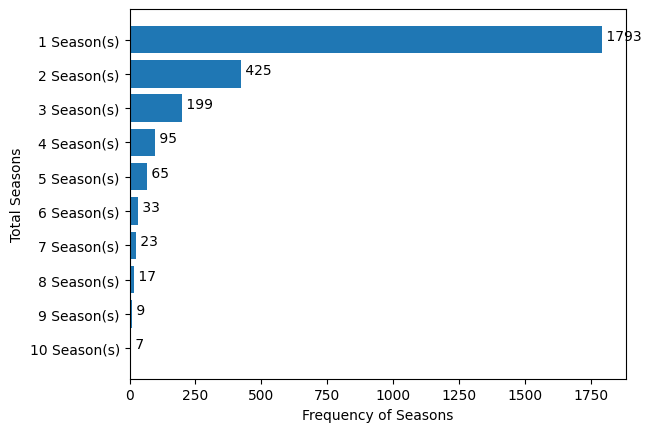

In [30]:
# Frequency plot of top 10 Duration categories
duration_df=shows_df.groupby(['duration_category']).agg({"title":"nunique"}).sort_values(by="title", ascending=False).head(10).reset_index()
plt.barh(duration_df['duration_category'][::-1], duration_df['title'][::-1])
for index, value in enumerate(duration_df['title'][::-1]):
    plt.text(value, index,
             f" {str(value)}")
plt.xlabel('Frequency of Seasons')
plt.ylabel('Total Seasons')
plt.show()

> We have 1793 TV show titles which just have 1 Season and with each progressive Season, the count of titles are decreasing almost exponentially

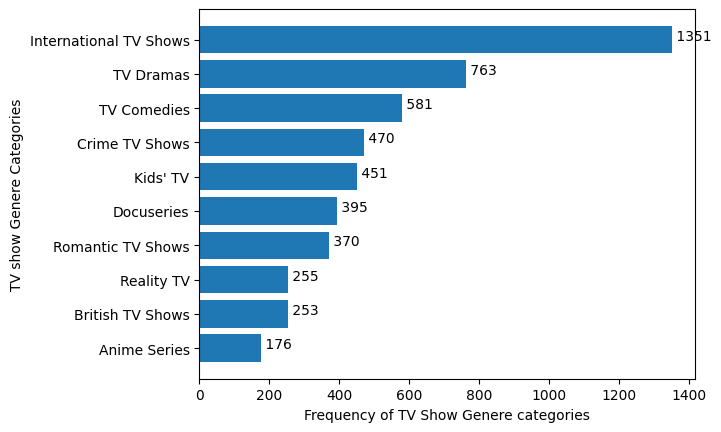

In [31]:
# Frequency plot of top 10 TV-show Genere categories
genere_df=shows_df.groupby(['genere_category']).agg({"title":"nunique"}).sort_values(by="title", ascending=False).head(10).reset_index()
plt.barh(genere_df['genere_category'][::-1], genere_df['title'][::-1])
for index, value in enumerate(genere_df['title'][::-1]):
    plt.text(value, index,
             f" {str(value)}")
plt.xlabel('Frequency of TV Show Genere categories')
plt.ylabel('TV show Genere Categories')
plt.show()

> Most available TV shows belong to the genere: International TV shows.

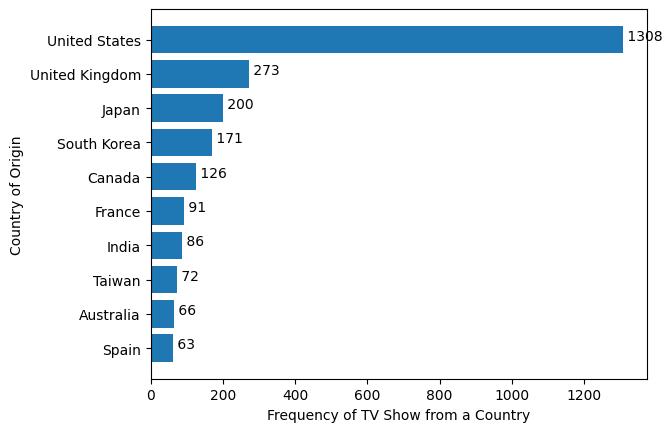

In [32]:
# Frequency plot of top 10 TV-show Country of origin
country_df=shows_df.groupby(['country']).agg({"title":"nunique"}).sort_values(by="title", ascending=False).head(10).reset_index()
plt.barh(country_df['country'][::-1], country_df['title'][::-1])
for index, value in enumerate(country_df['title'][::-1]):
    plt.text(value, index,
             f" {str(value)}")
plt.xlabel('Frequency of TV Show from a Country')
plt.ylabel('Country of Origin')
plt.show()

> Most available shows Originate from USA

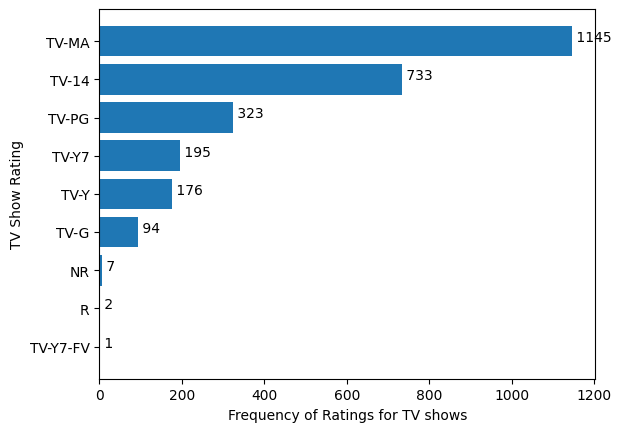

In [33]:
# Frequency plot of TV-Show rating
rating_df=shows_df.groupby(['rating']).agg({"title":"nunique"}).sort_values(by="title", ascending=False).reset_index()
plt.barh(rating_df['rating'][::-1], rating_df['title'][::-1])
for index, value in enumerate(rating_df['title'][::-1]):
    plt.text(value, index,
             f" {str(value)}")
plt.xlabel('Frequency of Ratings for TV shows')
plt.ylabel('TV Show Rating')
plt.show()

> Most available content are for mature audiences. Hence, a parental Child-lock is much required for Netflix content

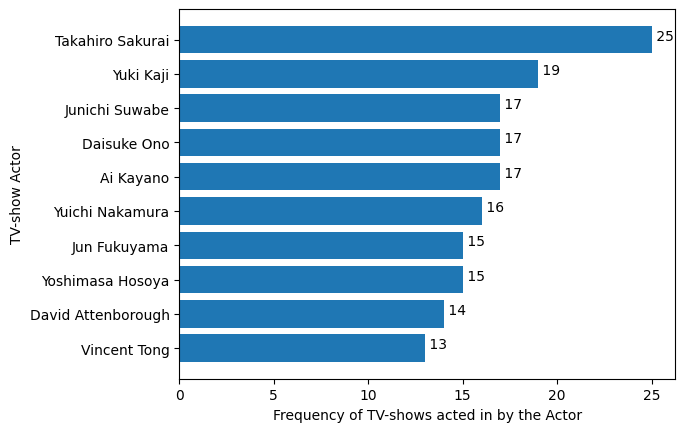

In [34]:
# Frequency plot of top 10 TV-Show Actors whose content are available
actor_df=shows_df.groupby(['actor_name']).agg({"title":"nunique"}).sort_values(by="title", ascending=False).head(11).reset_index()
actor_df=actor_df[actor_df['actor_name']!='Unknown Actor']
plt.barh(actor_df['actor_name'][::-1], actor_df['title'][::-1])
for index, value in enumerate(actor_df['title'][::-1]):
    plt.text(value, index,
             f" {str(value)}")
plt.xlabel('Frequency of TV-shows acted in by the Actor')
plt.ylabel('TV-show Actor')
plt.show()

Most TV-show content available has been directed by the Director: `Takahiro Sakurai`

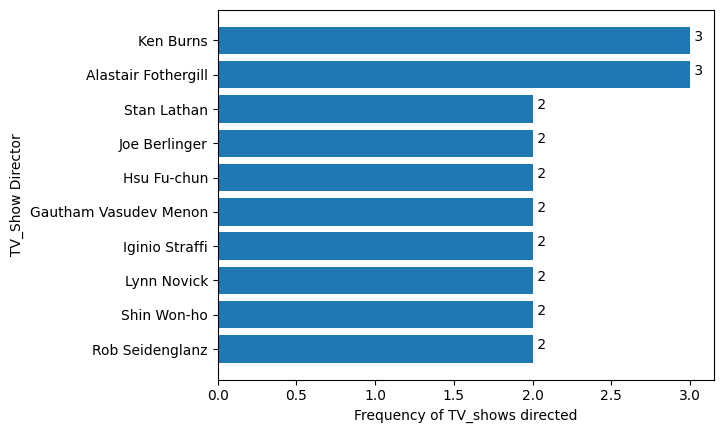

In [35]:
# Frequency plot of top 10 TV-show Directors whose content are available
director_df=shows_df.groupby(['director_name']).agg({"title":"nunique"}).sort_values(by="title", ascending=False).head(11).reset_index()
director_df=director_df[director_df['director_name']!='Unknown Director']
plt.barh(director_df['director_name'][::-1], director_df['title'][::-1])
for index, value in enumerate(director_df['title'][::-1]):
    plt.text(value, index,
             f" {str(value)}")
plt.xlabel('Frequency of TV_shows directed')
plt.ylabel('TV_Show Director')
plt.show()

Most TV-show content available has the actor: `Ken Burns`

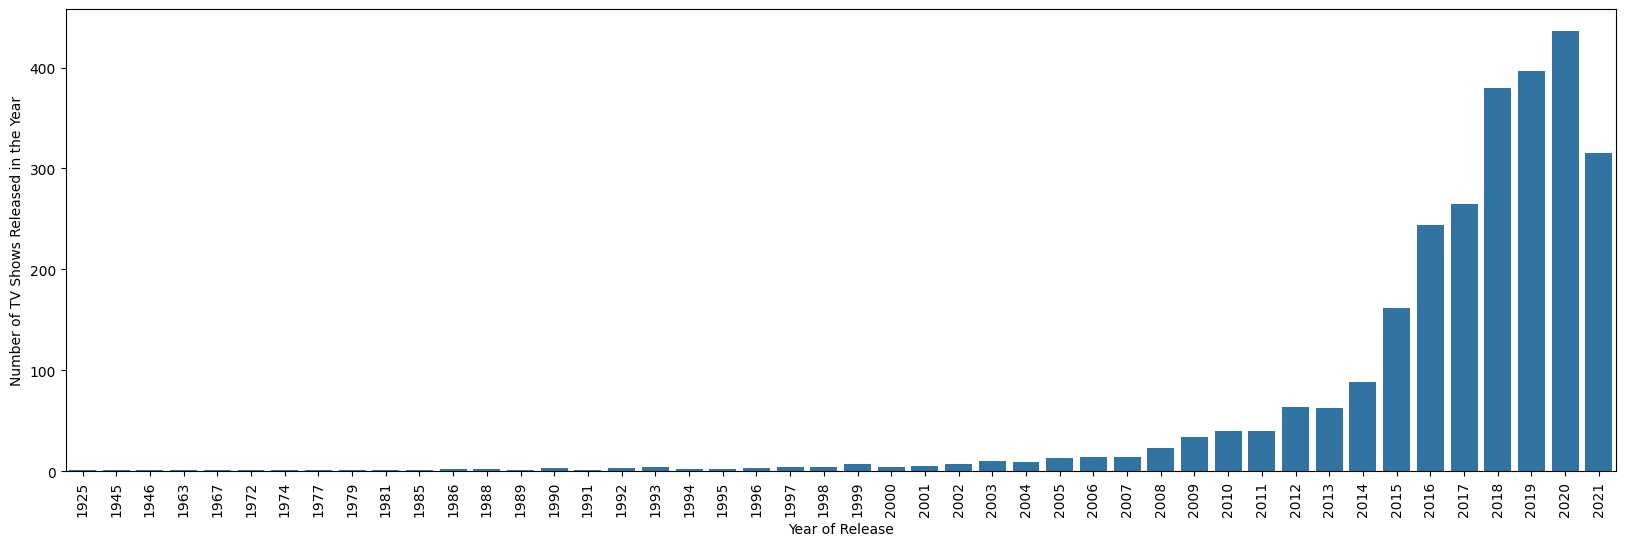

In [36]:
year_df=shows_df.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
fig = plt.figure(figsize=(20, 6))
sns.barplot(data=year_df, x='release_year', y='title')
plt.xticks(rotation=90)
plt.ylabel("Number of TV Shows Released in the Year")
plt.xlabel("Year of Release")
plt.show()

After an exponential increase in the number of TV-show released after the year 2000, there is a significant dip observed after 2020 possibly due to COVID-19 outbreak

In [37]:
# Duration Analysis for Movies
movies_df.groupby(['duration_category']).agg({"title":"nunique"}).sort_values(by="title", ascending=False).head()

,title
duration_category,
91 - 120 mins,2996
61 - 90 mins,1506
121 - 150 mins,897
31 - 60 mins,357
151 - 180 mins,198


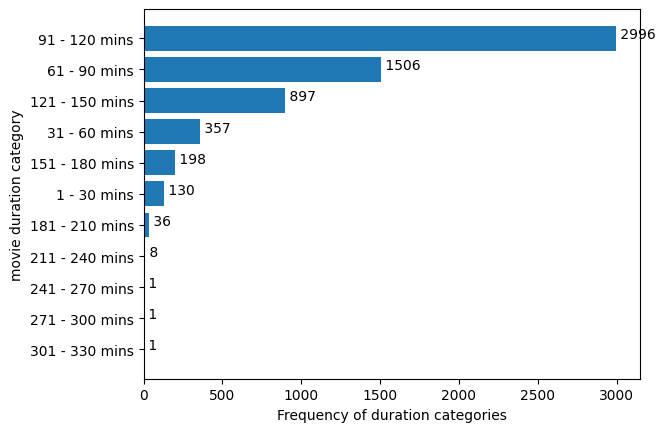

In [38]:
# Frequency plot of top 10 Movie Duration categories
duration_df = movies_df.groupby(['duration_category']).agg({"title":"nunique"}).sort_values(by="title", ascending=False).reset_index()
plt.barh(duration_df['duration_category'][::-1], duration_df['title'][::-1])
for index, value in enumerate(duration_df['title'][::-1]):
    plt.text(value, index,
             f" {str(value)}")
plt.xlabel('Frequency of duration categories')
plt.ylabel('movie duration category')
plt.show()

> Most available movies are between 1.5-2 hours long

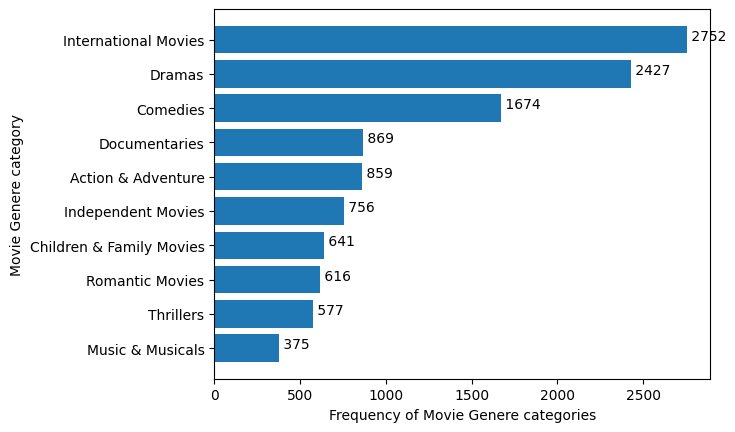

In [39]:
# Frequency plot of top 10 Movie Genere categories
genere_df=movies_df.groupby(['genere_category']).agg({"title":"nunique"}).sort_values(by="title", ascending=False).head(10).reset_index()
plt.barh(genere_df['genere_category'][::-1], genere_df['title'][::-1])
for index, value in enumerate(genere_df['title'][::-1]):
    plt.text(value, index,
             f" {str(value)}")
plt.xlabel('Frequency of Movie Genere categories')
plt.ylabel('Movie Genere category')
plt.show()

> Most available movies belong to International Movies

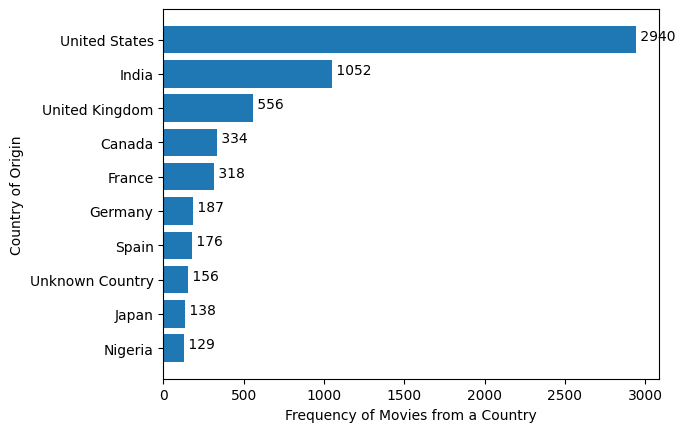

In [40]:
# Frequency plot of top 10 Movie Country of origin
country_df=movies_df.groupby(['country']).agg({"title":"nunique"}).sort_values(by="title", ascending=False).head(10).reset_index()
plt.barh(country_df['country'][::-1], country_df['title'][::-1])
for index, value in enumerate(country_df['title'][::-1]):
    plt.text(value, index,
             f" {str(value)}")
plt.xlabel('Frequency of Movies from a Country')
plt.ylabel('Country of Origin')
plt.show()

> Most available movies Originate from USA, then India

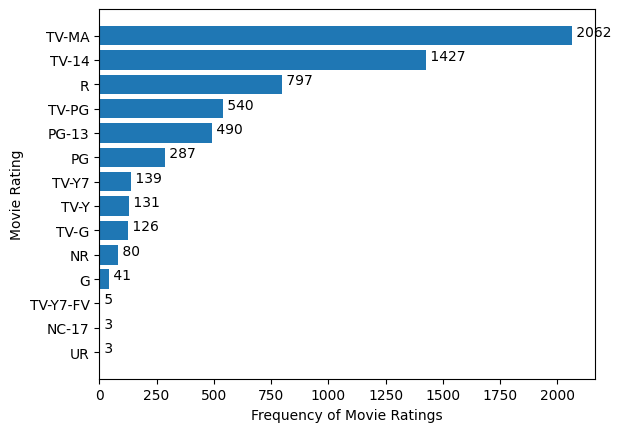

In [41]:
# Frequency plot of Movie rating
rating_df=movies_df.groupby(['rating']).agg({"title":"nunique"}).sort_values(by="title", ascending=False).reset_index()
plt.barh(rating_df['rating'][::-1], rating_df['title'][::-1])
for index, value in enumerate(rating_df['title'][::-1]):
    plt.text(value, index,
             f" {str(value)}")
plt.xlabel('Frequency of Movie Ratings')
plt.ylabel('Movie Rating')
plt.show()

> Most available content are for mature audiences

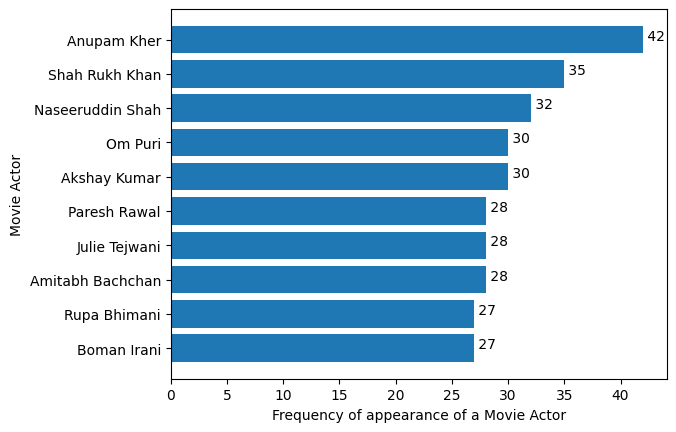

In [42]:
# Frequency plot of top 10 Movie Actors whose content are available
actor_df=movies_df.groupby(['actor_name']).agg({"title":"nunique"}).sort_values(by="title", ascending=False).head(11).reset_index()
actor_df=actor_df[actor_df['actor_name']!='Unknown Actor']
plt.barh(actor_df['actor_name'][::-1], actor_df['title'][::-1])
for index, value in enumerate(actor_df['title'][::-1]):
    plt.text(value, index,
             f" {str(value)}")
plt.xlabel('Frequency of appearance of a Movie Actor')
plt.ylabel('Movie Actor')
plt.show()

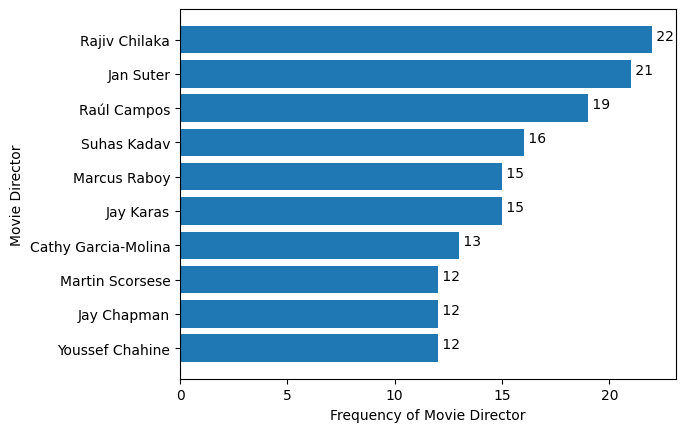

In [43]:
# Frequency plot of top 10 Movie Directors whose content are available
director_df=movies_df.groupby(['director_name']).agg({"title":"nunique"}).sort_values(by="title", ascending=False).head(11).reset_index()
director_df=director_df[director_df['director_name']!='Unknown Director']
plt.barh(director_df['director_name'][::-1], director_df['title'][::-1])
for index, value in enumerate(director_df['title'][::-1]):
    plt.text(value, index,
             f" {str(value)}")
plt.xlabel('Frequency of Movie Director')
plt.ylabel('Movie Director')
plt.show()

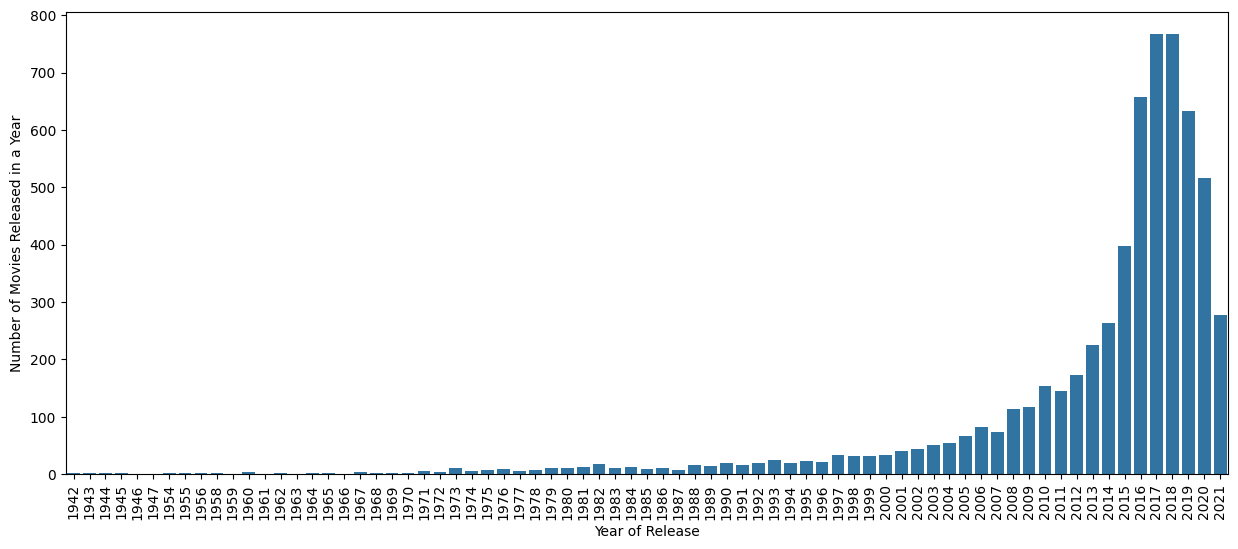

In [44]:
year_df=movies_df.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
fig = plt.figure(figsize=(15, 6))
sns.barplot(data=year_df, x='release_year', y='title')
plt.xticks(rotation=90)
plt.ylabel("Number of Movies Released in a Year")
plt.xlabel("Year of Release")
plt.show()

After an exponential increase in the number of Movies released after the year 1995, there is a significant dip observed after 2019 possibly due to COVID-19 outbreak

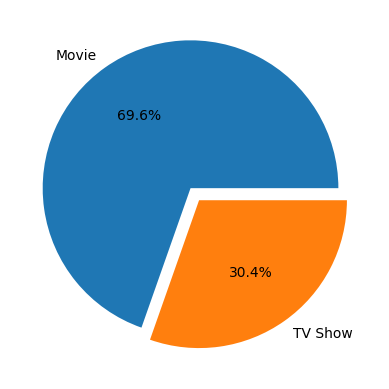

In [45]:
# Frequency plot of movies vs TV shows
type_df=res_df.groupby(['type']).agg({"title":"nunique"}).sort_values(by="title", ascending=False).head(10).reset_index()
plt.pie(type_df['title'], explode=(0.05,0.05), labels=type_df['type'], autopct='%.1f%%')
plt.show()

Approx 70% of the content available is of type Movie

In [46]:
# Analysis to check the best time to launch a TV show
# First we find the week, month and year added for each show/movie
res_df.date_added.head(1)

0    September 25, 2021
Name: date_added, dtype: object

In [47]:
from datetime import datetime
res_df['datetime_added'] = pd.to_datetime(res_df['date_added'].apply(lambda x: datetime.strptime(x.strip(), '%B %d, %Y')))
res_df['year_added']=res_df['datetime_added'].dt.year
res_df['week_added'] = res_df['datetime_added'].dt.isocalendar().week
res_df['month_added']=res_df['datetime_added'].dt.month_name()
res_df["month_added"] = pd.Categorical(res_df["month_added"], categories=['January', 'February', 'March',
                                       'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
res_df['weekday_added']=res_df['datetime_added'].dt.day_name()
res_df["weekday_added"] = pd.Categorical(res_df["weekday_added"], categories=[
                                         'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
res_df.head()

,title,director_name,actor_name,country,genere_category,show_id,type,date_added,release_year,rating,duration,duration_int,duration_category,datetime_added,year_added,week_added,month_added,weekday_added
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min,90,61 - 90 mins,2021-09-25,2021,38,September,Saturday
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2 Season(s),2021-09-24,2021,38,September,Friday
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2 Season(s),2021-09-24,2021,38,September,Friday
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2 Season(s),2021-09-24,2021,38,September,Friday
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2 Season(s),2021-09-24,2021,38,September,Friday


In [48]:
# Created Dataframes for displaying dodged bar plots for TV shows vs Movies release dates
dodged_monthly_df = res_df.groupby(["month_added", "type"])[
    "title"].agg("nunique").unstack().sort_values("month_added")
dodged_weekday_df = res_df.groupby(["weekday_added", "type"])[
    "title"].agg("nunique").unstack().sort_values("weekday_added")
dodged_yearly_df = res_df.groupby(["year_added", "type"])[
    "title"].agg("nunique").unstack()
dodged_weekly_df = res_df.groupby(["week_added", "type"])[
    "title"].agg("nunique").unstack()

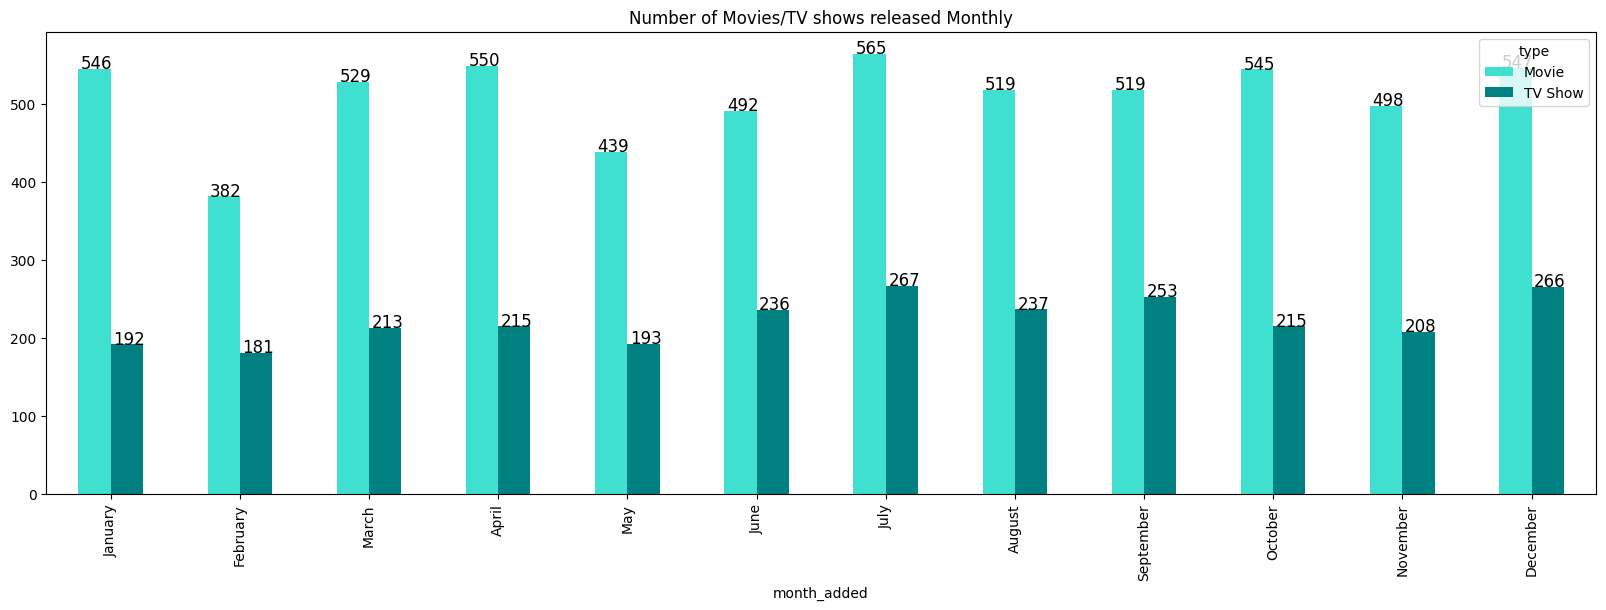

In [49]:
fig, ax = plt.subplots(figsize=(20, 6))
dodged_monthly_df.plot(kind="bar", ax=ax, color=['turquoise', 'teal'], title="Number of Movies/TV shows released Monthly")
for p in ax.patches:
    t = ax.annotate(str(p.get_height()),
                    (p.get_x() + 0.02, p.get_height() + 0.1))
    t.set(color="black", size=12)

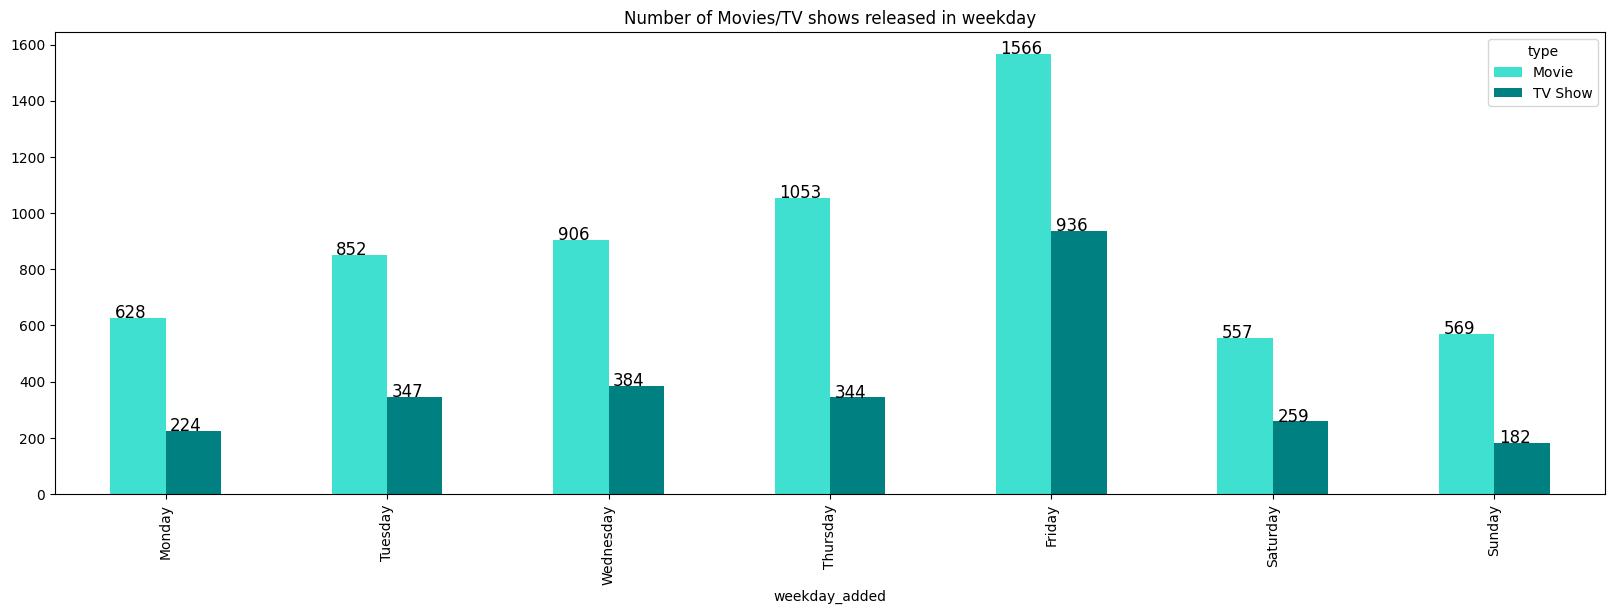

In [50]:
fig, ax = plt.subplots(figsize=(20, 6))
dodged_weekday_df.plot(kind="bar", ax=ax, color=[
                       'turquoise', 'teal'], title="Number of Movies/TV shows released in weekday")
for p in ax.patches:
    t = ax.annotate(str(p.get_height()),
                    (p.get_x() + 0.02, p.get_height() + 0.1))
    t.set(color="black", size=12)

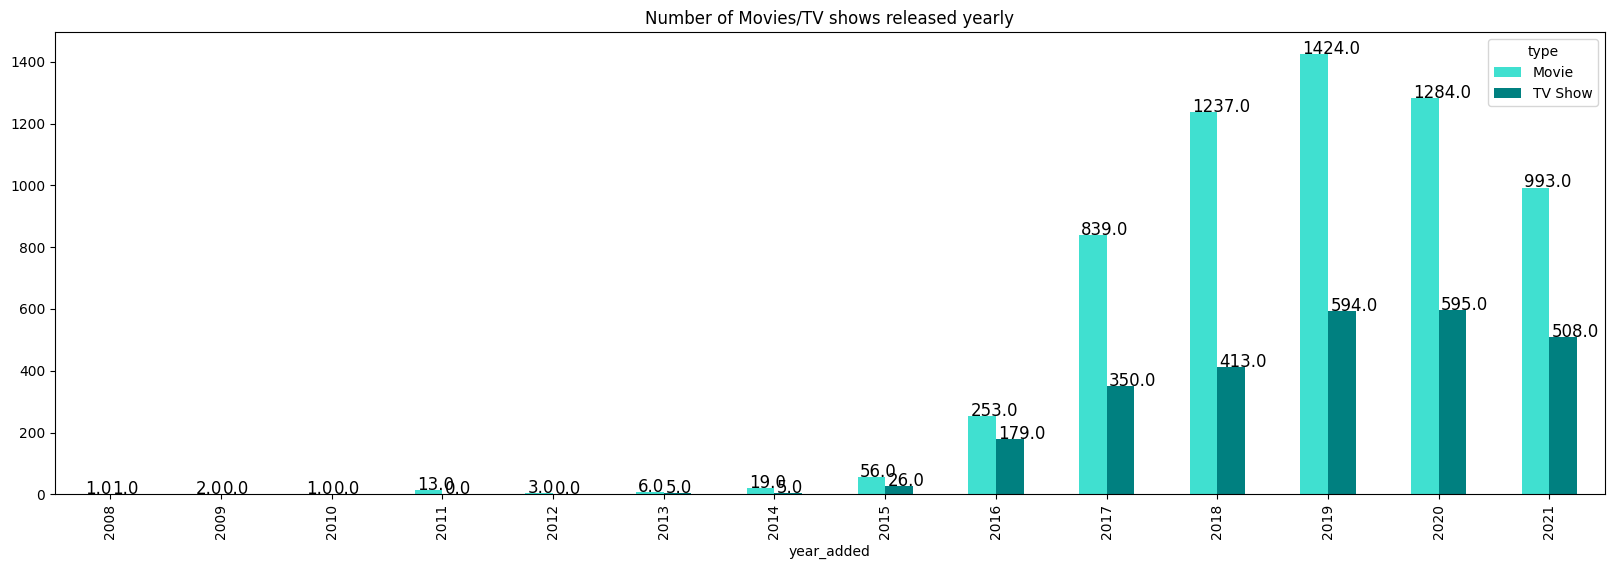

In [51]:
fig, ax = plt.subplots(figsize=(20, 6))
dodged_yearly_df.plot(kind="bar", ax=ax, color=[
                       'turquoise', 'teal'], title="Number of Movies/TV shows released yearly")
for p in ax.patches:
    t = ax.annotate(str(p.get_height()),
                    (p.get_x() + 0.02, p.get_height() + 0.1))
    t.set(color="black", size=12)

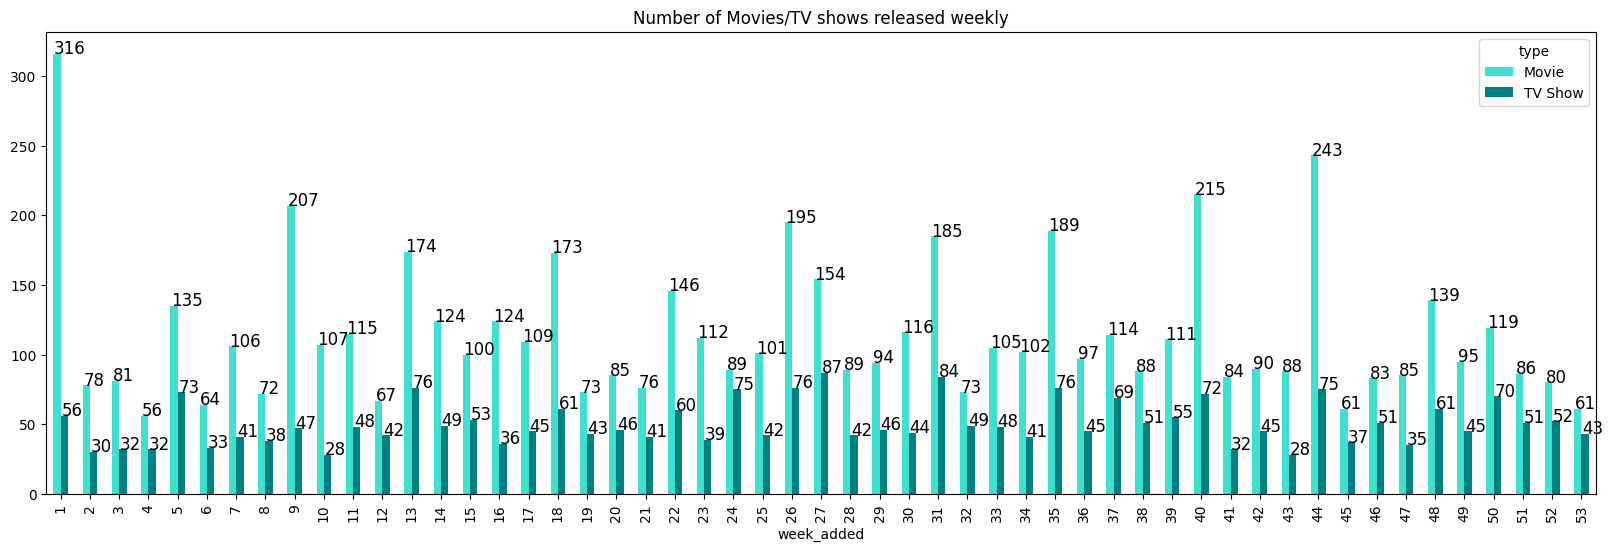

In [52]:
fig, ax = plt.subplots(figsize=(20, 6))
dodged_weekly_df.plot(kind="bar", ax=ax, color=[
                       'turquoise', 'teal'], title="Number of Movies/TV shows released weekly")
for p in ax.patches:
    t = ax.annotate(str(p.get_height()),
                    (p.get_x() + 0.02, p.get_height() + 0.1))
    t.set(color="black", size=12)

In [53]:
# Updating the newly added datetime columns for shows and movies dataframes
shows_df = res_df[res_df['type'] == 'TV Show']
movies_df = res_df[res_df['type'] =='Movie']

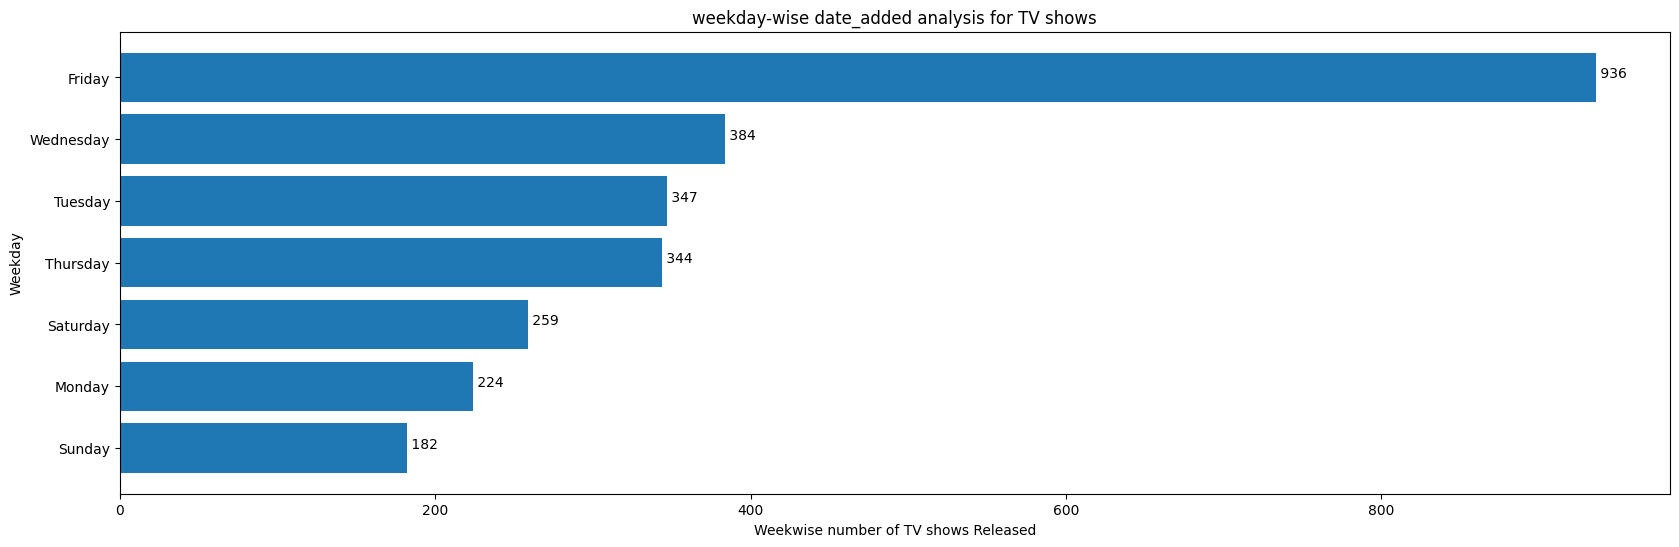

In [54]:
# weekday-wise date_added analysis for TV shows
weekday_df=shows_df.groupby(['weekday_added']).agg({"title":"nunique"}).sort_values(by="title", ascending=False).reset_index()
plt.figure(figsize=(20,6))
plt.barh(weekday_df['weekday_added'][::-1], weekday_df["title"][::-1])
for index, value in enumerate(weekday_df['title'][::-1]):
    plt.text(value, index,
             f" {str(value)}")
plt.title("weekday-wise date_added analysis for TV shows")
plt.ylabel("Weekday")
plt.xlabel("Weekwise number of TV shows Released")
plt.show()

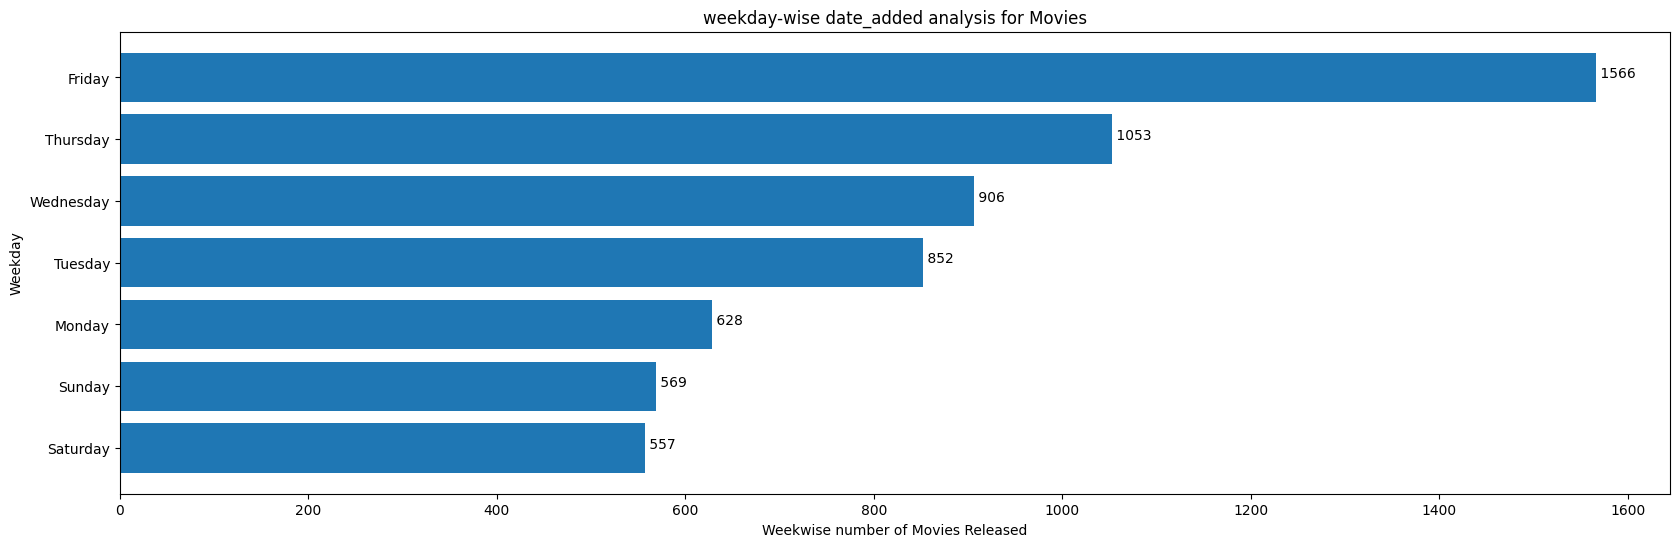

In [55]:
# weekday-wise date_added analysis for Movies
weekday_df = movies_df.groupby(['weekday_added']).agg({"title":"nunique"}).sort_values(by="title", ascending=False).reset_index()
plt.figure(figsize=(20, 6))
plt.barh(weekday_df['weekday_added'][::-1], weekday_df["title"][::-1])
for index, value in enumerate(weekday_df['title'][::-1]):
    plt.text(value, index,
             f" {str(value)}")
plt.title("weekday-wise date_added analysis for Movies")
plt.ylabel("Weekday")
plt.xlabel("Weekwise number of Movies Released")
plt.show()

For both Movies and TV shows, the maximum number of releases were observed on Fridays

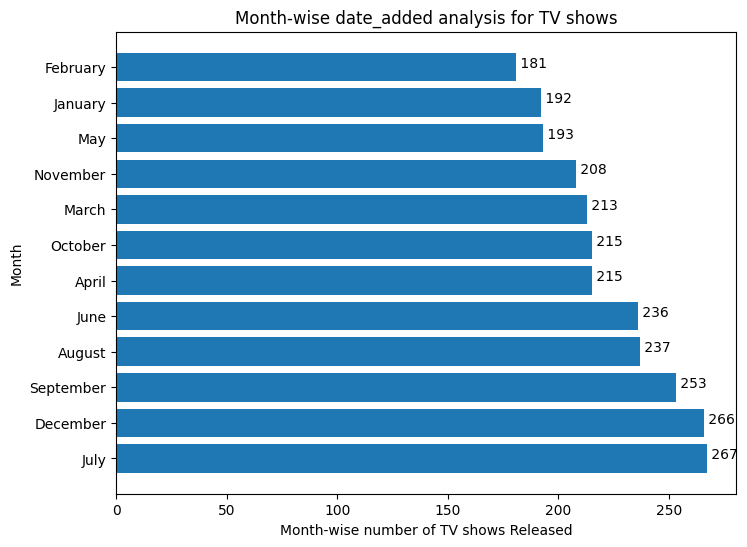

In [56]:
# Month-wise date_added analysis for TV shows
month_df = shows_df.groupby(['month_added']).agg(
    {"title": "nunique"}).sort_values(by="title", ascending=False).reset_index()
plt.figure(figsize=(8, 6))
plt.barh(month_df['month_added'], month_df["title"])
for index, value in enumerate(month_df['title']):
    plt.text(value, index,
             f" {str(value)}")
plt.title("Month-wise date_added analysis for TV shows")
plt.ylabel("Month")
plt.xlabel("Month-wise number of TV shows Released")
plt.show()

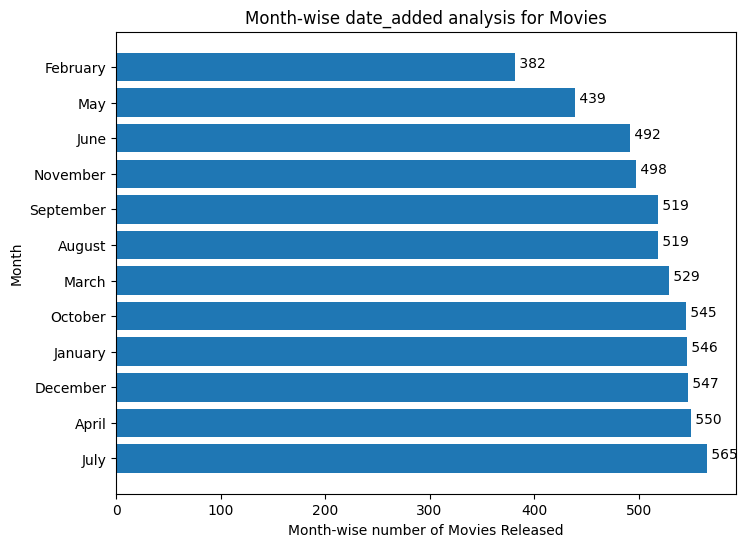

In [57]:
# Month-wise date_added analysis for Movies
month_df = movies_df.groupby(['month_added']).agg(
    {"title": "nunique"}).sort_values(by="title", ascending=False).reset_index()
plt.figure(figsize=(8, 6))
plt.barh(month_df['month_added'], month_df["title"])
for index, value in enumerate(month_df['title']):
    plt.text(value, index,
             f" {str(value)}")
plt.title("Month-wise date_added analysis for Movies")
plt.ylabel("Month")
plt.xlabel("Month-wise number of Movies Released")
plt.show()

In [73]:
# Movie added vs release year analysis
added_vs_release_df = movies_df.groupby(['year_added', 'release_year']).agg({"title": "nunique"}).sort_values(
    by="title", ascending=False).reset_index()
added_vs_release_df["added-release"] = added_vs_release_df["year_added"] - \
    added_vs_release_df["release_year"]
added_vs_release_df

,year_added,release_year,title,added-release
0,2020,2020,397,0
1,2019,2019,379,0
2,2018,2018,343,0
3,2021,2021,277,0
4,2019,2018,274,1
...,...,...,...,...
294,2017,1988,1,29
295,2017,1989,1,28
296,2017,1990,1,27
297,2020,1985,1,35


In [74]:
added_vs_release_df[added_vs_release_df["added-release"] < 0]

,year_added,release_year,title,added-release
261,2017,2018,1,-1
272,2018,2019,1,-1


There seem to be some entries for movies which show release_year greater than the date when they were added.
Perhaps these would be for cases which may have been announced and proposed for release, but were not made available for 1 years from being announced.

Text(0.5, 1.0, 'Number of years after which the movie was made available after they were released')

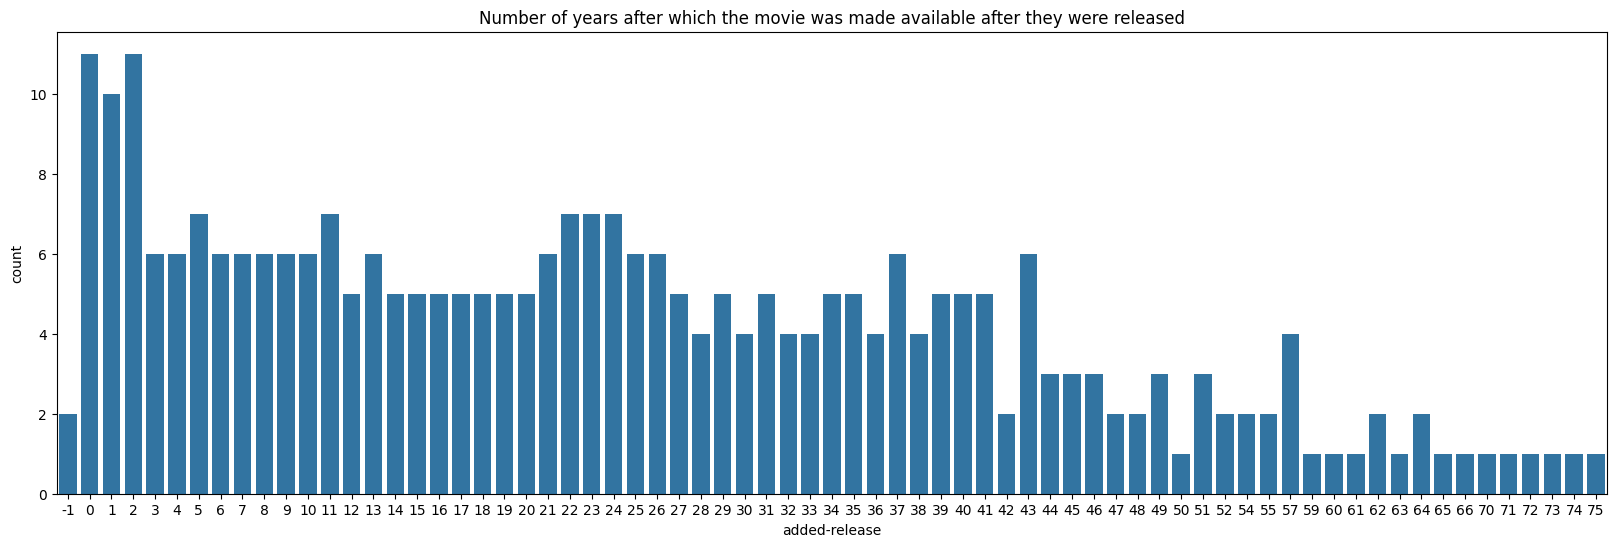

In [75]:
plt.figure(figsize=(20,6))
sns.countplot(x="added-release", data=added_vs_release_df)
plt.title("Number of years after which the movie was made available after they were released")

As per the above plot, it appears that most of the movies become available within a year after it is released

In [76]:
# TV shows added vs release year analysis
added_vs_release_df = shows_df.groupby(['year_added', 'release_year']).agg({"title": "nunique"}).sort_values(
    by="title", ascending=False).reset_index()
added_vs_release_df["added-release"] = added_vs_release_df["year_added"] - \
    added_vs_release_df["release_year"]
added_vs_release_df[added_vs_release_df["added-release"] < 0]

,year_added,release_year,title,added-release
61,2019,2020,4,-1
76,2020,2021,3,-1
90,2018,2019,2,-1
140,2013,2016,1,-3
143,2016,2017,1,-1
144,2016,2018,1,-2


There seem to be some entries for TV shows which show release_year greater than the date when they were added.
Perhaps these would be for cases which may have been announced and proposed for release, but were not made available for 1-3 years from being announced.

Text(0.5, 1.0, 'Number of years after which the shows were made available after they were released')

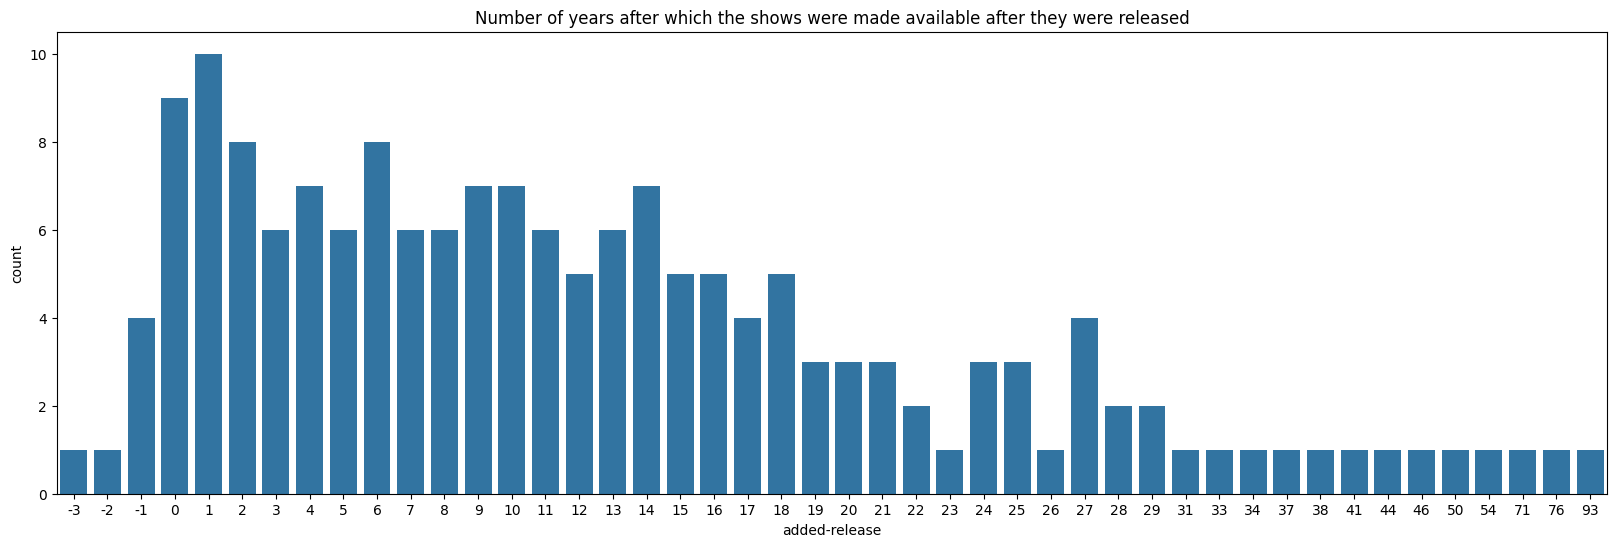

In [77]:
plt.figure(figsize=(20, 6))
sns.countplot(x="added-release", data=added_vs_release_df)
plt.title(
    "Number of years after which the shows were made available after they were released")

As per the above plot, it appears that most of the TV shows takes more than a year for the shows to be available after their release